In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from datetime import datetime

# import warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


We are checking crime data of the city Philadelphia from 2006-2017. We begin by checking the various features of the data - the columns. And, we check how it varies by several factors - day, month, year, crime and police district! 

We expect it to show some seasonal and diurnal pattern. We will check if that's the case.

We will also check how the Crime Counts vary by Police District Per Year, by crime types per police district and by  Crime Types Per Year ! 


In [2]:
path = os.getcwd()

In [3]:
path

'/home/kc3pve/Desktop/Spring-Git/Springboard/Datastory'

In [4]:
import csv
from dbfread import DBF

# for converting to dbf file to csv file (in case it needs conversion)
def dbf_to_csv(dbf_table_pth):#Input a dbf, output a csv, same name, same path, except extension
    csv_fn = dbf_table_pth[:-4]+ ".csv" #Set the csv file name
    table = DBF(dbf_table_pth)# table variable is a DBF object
    with open(csv_fn, 'w', newline = '') as f:# create a csv file, fill it with dbf content
        writer = csv.writer(f)
        writer.writerow(table.field_names)# write the column name
        for record in table:# write the rows
            writer.writerow(list(record.values()))
    return csv_fn# return the csv name

In [5]:
#crime_data = path + '/Data/' + 'incidents_part1_part2.dbf'
crime_data = path + '/Data/' + 'crime.csv'

In [6]:
crime_data

'/home/kc3pve/Desktop/Spring-Git/Springboard/Datastory/Data/crime.csv'

In [7]:
crime_data = pd.read_csv(crime_data)

In [8]:
crime_data.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [9]:
crime_data.shape

(2237605, 14)

In [10]:
type(crime_data)

pandas.core.frame.DataFrame

In [11]:
crime_data.describe()

,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat
count,2.237605e+06,2.237605e+06,2.237605e+06,2.236942e+06,2.217675e+06,2.220256e+06,2.220256e+06
mean,1.726837e+01,1.315990e+01,2.010975e+11,1.271354e+03,1.206404e+01,-7.514992e+01,3.999201e+01
std,1.064898e+01,6.799952e+00,3.234684e+08,8.143510e+02,5.792056e+00,5.973890e-02,4.534823e-02
min,1.000000e+00,0.000000e+00,1.998121e+11,1.000000e+02,1.000000e+00,-7.527773e+01,3.986999e+01
25%,9.000000e+00,9.000000e+00,2.008151e+11,6.000000e+02,8.000000e+00,-7.518490e+01,3.995571e+01
50%,1.600000e+01,1.400000e+01,2.011060e+11,8.000000e+02,1.200000e+01,-7.515668e+01,3.999105e+01
75%,2.400000e+01,1.900000e+01,2.014021e+11,1.800000e+03,1.700000e+01,-7.511844e+01,4.002739e+01
max,9.200000e+01,2.300000e+01,2.017770e+11,2.600000e+03,2.200000e+01,-7.495750e+01,4.013790e+01


In [12]:
# Exclude rows without a crime type or description
crime_data.dropna(subset=['UCR_General', 'Text_General_Code'], inplace = True)

crime_data.shape

(2236942, 14)

In [13]:
pd.options.display.float_format = '{:,.2f}'.format

In [14]:
dc_dist_distinct = crime_data.groupby('Dc_Dist')['Dc_Dist'].count()
print(dc_dist_distinct)

Dc_Dist
1      48757
2     116382
3      85720
4      29198
5      31433
6      96354
7      44687
8      73817
9      83974
12    132140
14    120931
15    184648
16     73052
17     74900
18    109746
19    138956
22    127330
23     27278
24    161896
25    151239
26     86970
35    131035
39     97059
77      7813
92      1627
Name: Dc_Dist, dtype: int64


In [15]:
ucr_text_distinct = crime_data.groupby(['UCR_General', 'Text_General_Code']).size()
ucr_text_distinct

UCR_General  Text_General_Code                      
100.00       Homicide - Criminal                          3442
             Homicide - Gross Negligence                    12
             Homicide - Justifiable                         42
200.00       Rape                                        11852
300.00       Robbery Firearm                             40577
             Robbery No Firearm                          51919
400.00       Aggravated Assault Firearm                  27934
             Aggravated Assault No Firearm               68989
500.00       Burglary Non-Residential                    23276
             Burglary Residential                        94143
600.00       Theft from Vehicle                         171135
             Thefts                                     257923
700.00       Motor Vehicle Theft                         46517
             Recovered Stolen Motor Vehicle              95282
800.00       Other Assaults                             277332
90

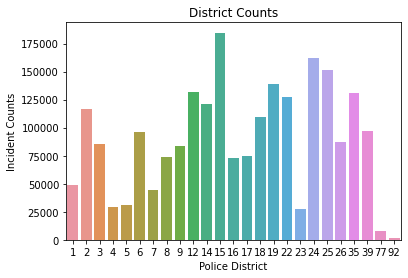

In [16]:
ax = sns.countplot(crime_data['Dc_Dist'])
ax.set_title('District Counts');
plt.xlabel("Police District")
plt.ylabel("Incident Counts")
plt.show()

Certain police districts have high crime counts (12th, 15th, 19th, 22nd, 24th and 25th) as seen in 
the above plot. And, there are certain districts (1st, 4th, 5th, 23rd, 77th and 92nd) 
with lesser crime counts. 



In [17]:
len = crime_data['Dispatch_Date'].size
len

2236942

In [18]:
#date_format = '%Y-%m-%d'
crime_data = crime_data.drop_duplicates(['Dispatch_Date_Time', 'Location_Block', 'UCR_General', 'Text_General_Code'])

In [19]:
def year(item):
    return item[:4]

def month(item):
    return item[5:]

# Get year, month as separate fields in dataset!
crime_data['Year-Mon'] = crime_data['Month']

crime_data['Year'] = crime_data['Year-Mon'].apply(year)
crime_data['Mon'] = crime_data['Year-Mon'].apply(month)


In [20]:
crime_data.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Year-Mon,Year,Mon
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.00,Other Assaults,NaN,2009-10,NaN,NaN,2009-10,2009,10
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,"2,600.00",All Other Offenses,NaN,2009-05,NaN,NaN,2009-05,2009,05
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.00,Other Assaults,NaN,2009-08,NaN,NaN,2009-08,2009,08
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,"1,500.00",Weapon Violations,20.00,2009-07,-75.13,40.04,2009-07,2009,07
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,"2,600.00",All Other Offenses,8.00,2009-06,-75.17,39.97,2009-06,2009,06


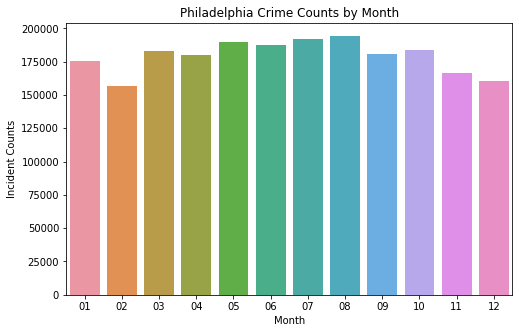

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
crime_data.sort_values(by=['Mon'], inplace=True);
sns.countplot(x='Mon', data=crime_data);
plt.title("Philadelphia Crime Counts by Month");
plt.xlabel("Month");
plt.ylabel("Incident Counts");

There is not much 'seasonal' trend seen from above plot. There is a dip in crime in winter (Nov - Feb) and a rise 
in crime counts in summer (May - Aug). But, this is not very strong 'variation'. 

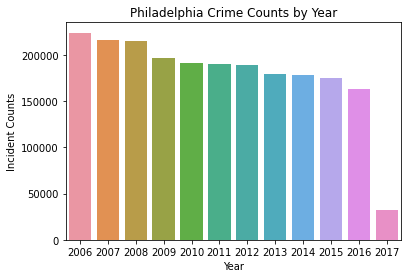

In [22]:
# How has crime changed over time?
crime_data.sort_values(by=['Year'], inplace=True);
sns.countplot(x = 'Year', data=crime_data);
plt.title("Philadelphia Crime Counts by Year")
plt.xlabel("Year")
plt.ylabel("Incident Counts")
plt.show()

The crime counts are seen decreasing over the years as seen in the above plot. There is a gradual decrease.

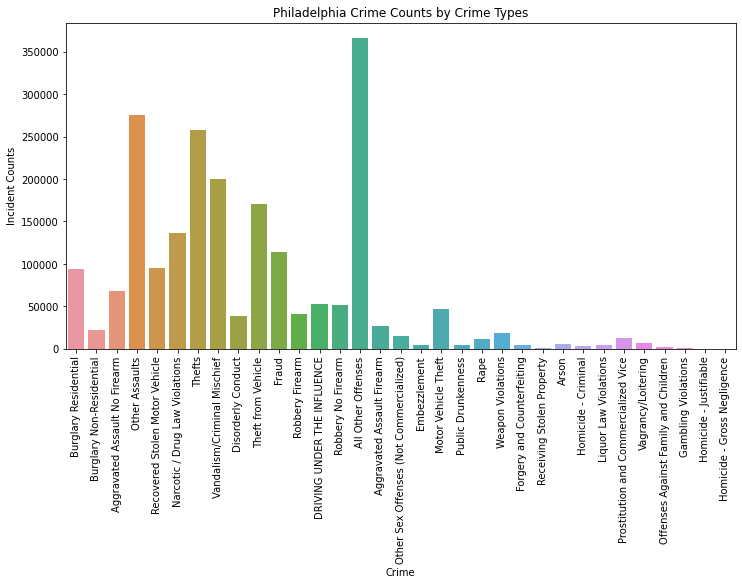

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(crime_data['Text_General_Code'])
plt.xlabel("Crime");
plt.ylabel("Incident Counts");
plt.title("Philadelphia Crime Counts by Crime Types")

plt.xticks(rotation=90);

Certain crimes -- such as Thefts and Vandalism, Criminal Mischief , Theft from Vehicle -- which are higher in counts than other crimes.

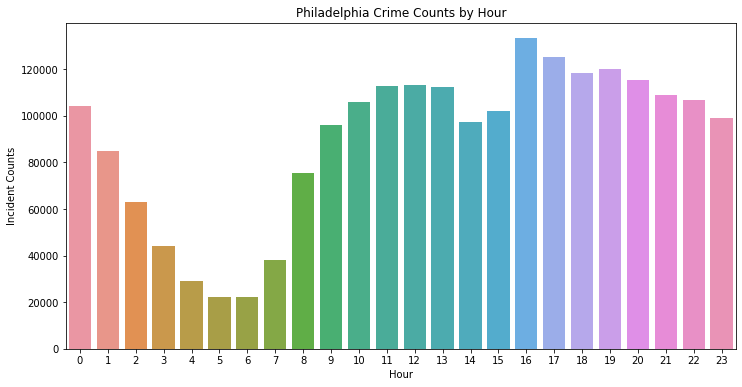

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(crime_data['Hour']);
plt.ylabel("Incident Counts");
plt.title("Philadelphia Crime Counts by Hour");

There is a strong diurnal pattern seen in the crime. It increases during the day-time beginning early morning 
at 9 AM to midnight.The crime counts decline in the hours after midnight (2 AM) and are at the lowest 
(at 5 AM/6 AM). 

In [25]:
crime_data.head(5)

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Year-Mon,Year,Mon
1269957,25,S,2006-03-22 02:41:00,2006-03-22,02:41:00,2,200625029784,3400 BLOCK N WATER ST,500.00,Burglary Residential,18.00,2006-03,-75.13,40.00,2006-03,2006,03
1334359,26,E,2006-07-11 19:17:00,2006-07-11,19:17:00,19,200626050709,2400 BLOCK FRANKFORD AVE,500.00,Burglary Non-Residential,19.00,2006-07,-75.13,39.98,2006-07,2006,07
1282184,14,Q,2006-03-30 09:37:00,2006-03-30,09:37:00,9,200614026049,7900 BLOCK WILLIAMS AVE,400.00,Aggravated Assault No Firearm,10.00,2006-03,-75.17,40.07,2006-03,2006,03
929161,1,C,2006-03-16 09:28:00,2006-03-16,09:28:00,9,200601009268,1900 BLOCK S 23RD ST,800.00,Other Assaults,1.00,2006-03,-75.18,39.93,2006-03,2006,03
1391151,6,M,2006-11-01 11:29:00,2006-11-01,11:29:00,11,200606066595,100 BLOCK CALLOWHILL ST,700.00,Recovered Stolen Motor Vehicle,5.00,2006-11,-75.14,39.96,2006-11,2006,11


In [160]:
## Most frequent streets and intersections - where are these located in the city?
location_distinct = crime_data.groupby(['Location_Block', 'Dc_Dist']).size()
location_distinct.sort_values(ascending=False, inplace=True)
print(location_distinct[:30])

Location_Block                          Dc_Dist
4600 BLOCK E ROOSEVELT BLVD             2          4124
1000 BLOCK MARKET ST                    6          3922
5200 BLOCK FRANKFORD AVE                15         3662
1300 BLOCK MARKET ST                    6          2700
1500 BLOCK MARKET ST                    9          2230
0 BLOCK N 52ND ST                       19         2106
2300 BLOCK COTTMAN AVE                  2          2072
2800 BLOCK KENSINGTON AVE               24         1935
2700 BLOCK KENSINGTON AVE               24         1782
1600 BLOCK S CHRISTOPHER COLUMBUS BLVD  3          1667
200 BLOCK S 13TH ST                     6          1646
5900 BLOCK N BROAD ST                   35         1591
1500 BLOCK N 52ND ST                    19         1550
1500 BLOCK JOHN F KENNEDY BLVD          9          1527
2700 BLOCK CASTOR AVE                   24         1512
400 BLOCK SOUTH ST                      3          1499
3400 BLOCK N BROAD ST                   25         1479


In [159]:
# Group only by dc_dist
location_distinct1 = crime_data.groupby(['Dc_Dist']).size()
location_distinct1.sort_values(ascending=False, inplace=True)
print(location_distinct1[:30])

Dc_Dist
15    174821
24    152129
25    145974
19    130817
35    127148
12    125397
22    124107
14    118865
2     109556
18    105934
39     94772
6      94528
26     84114
3      82970
9      82360
17     71975
8      71458
16     68976
1      47137
7      43768
5      30839
4      28444
23     25115
77      7531
92      1621
dtype: int64


The districts 15, 24, 25, 19 and 35 have the highest crime-counts.   

In [28]:
# Replace crime-types by their names
crime_type_dict = {100.0: 'Homicide',
                   200.0: 'Rape',
                   300.0: 'Robbery',
                   400.0: 'Aggravated Assault',
                   500.0: 'Burglary',
                   600.0: 'Theft',
                   700.0: 'Motor Vehicle Theft',
                   800.0: 'Other Assaults',
                   900.0: 'Arson',
                   1000.0: 'Forgery and Counterfeiting',
                   1100.0: 'Fraud',
                   1200.0: 'Embezzlement',
                   1300.0: 'Receiving Stolen Property',
                   1400.0: 'Vandalism',
                   1500.0: 'Weapon Violations',
                   1600.0: 'Prostitution',
                   1700.0: 'Other Sex Offenses',
                   1800.0: 'Drug Violations',
                   1900.0: 'Gambling Violations',
                   2000.0: 'Offenses against Families',
                   2100.0: 'Driving Under the Influence',
                   2200.0: 'Liquor Law Violations',
                   2300.0: 'Public Drunkenness',
                   2400.0: 'Disorderly Conduct',
                   2500.0: 'Vagrancy/Loitering',
                   2600.0: 'All Other Offenses'}

def replace_crime_type(ucr_general):
    '''Replace UCR General code with crime type'''
    if (ucr_general in crime_type_dict):
        ucr_general = crime_type_dict[ucr_general]
    return ucr_general

crime_data['UCR_General'] = crime_data['UCR_General'].apply(replace_crime_type)

In [29]:
# "Philadelphia Crime Types By Police District")
crime_data_type_dist    = crime_data.groupby(['UCR_General', 'Dc_Dist']).size().apply(int)
crime_data_type_dist_df = crime_data_type_dist.to_frame()
crime_data_type_dist_pt = pd.pivot_table(crime_data_type_dist_df, index=['UCR_General'], columns=['Dc_Dist'])[0] 

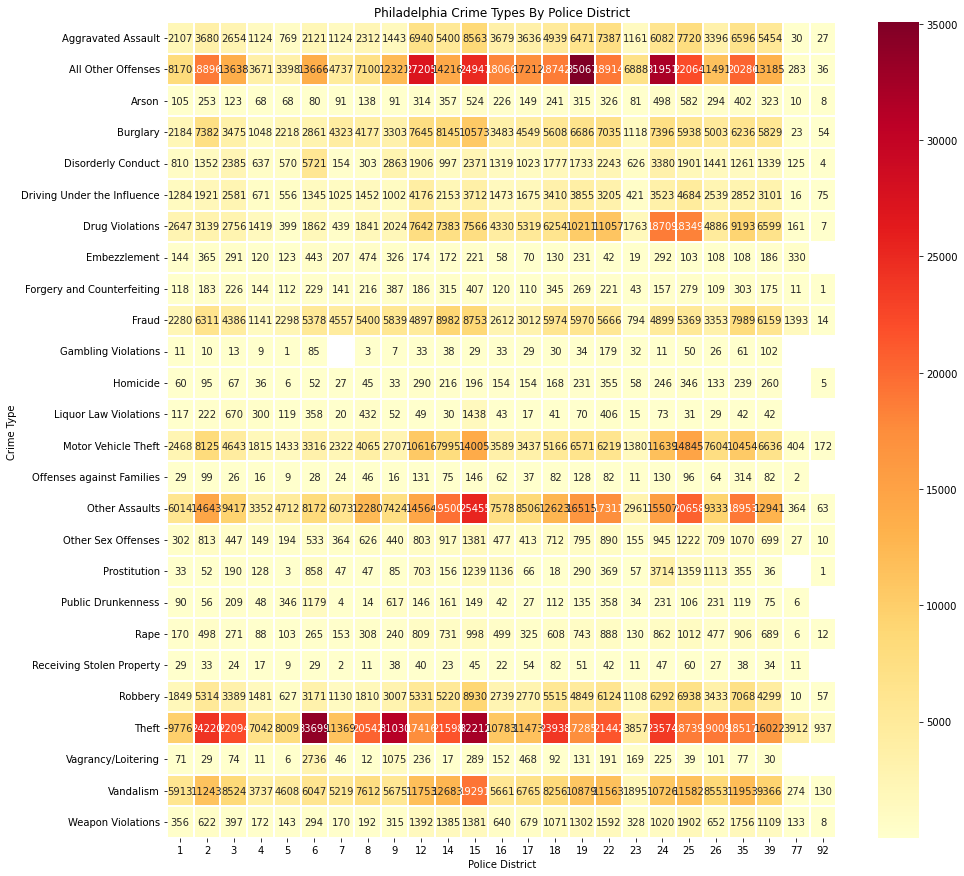

In [34]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=crime_data_type_dist_pt, annot=True, linewidths=0.1, fmt='g', cmap="YlOrRd", ax=ax)
plt.title("Philadelphia Crime Types By Police District")
plt.xlabel("Police District")
plt.ylabel("Crime Type ")
plt.show()

We see 'theft' has higher counts in most police districts except the 92nd district where it is 937. 'All other offenses' ,'Other Assaults' , 'Motor Vehicle Theft' are also high in most of the police districts. 'Gambling Violations', 'Vagrancy/Loitering' , 'Receiving Stolen Property', 'Homicide' (amongst others) are low across all the police districts.


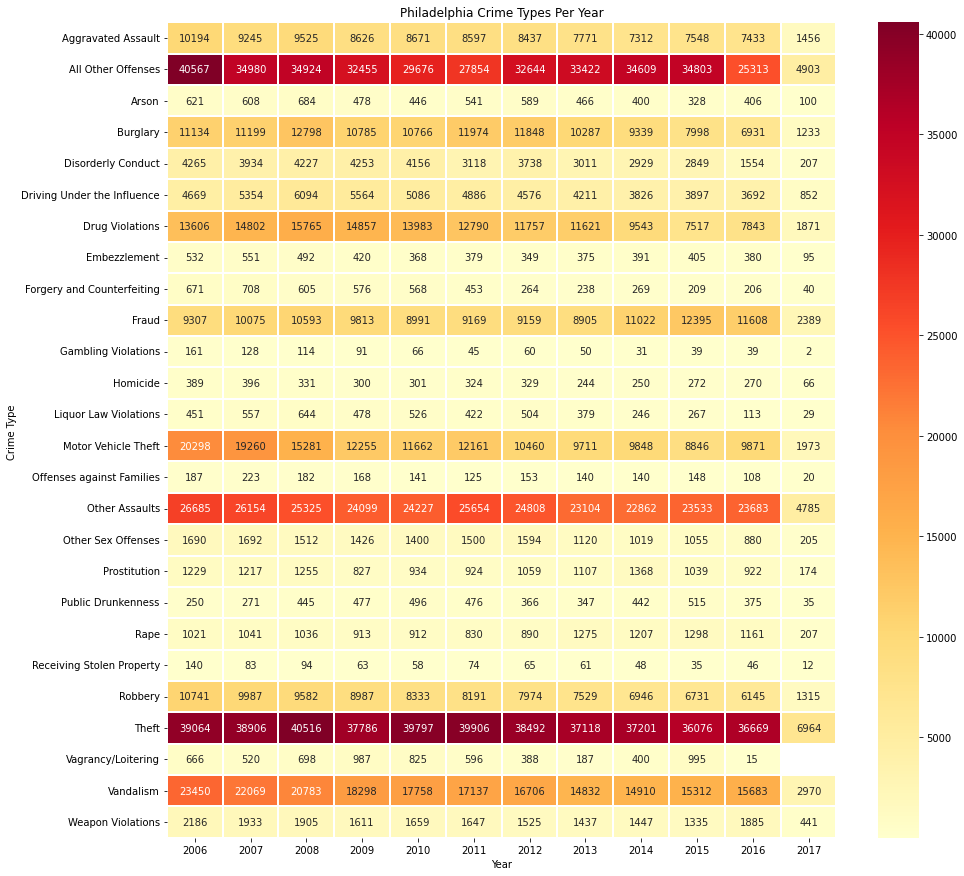

In [33]:
# Crime types by year
crime_data_type_year = crime_data.groupby(['UCR_General', 'Year']).size()
crime_data_type_year = crime_data_type_year.apply(int)
crime_data_type_year_df = crime_data_type_year.to_frame()
crime_data_type_year_pt = pd.pivot_table(crime_data_type_year_df, index=['UCR_General'], columns=['Year'])[0] # Get rid of '0 column'

# Heatmap representation
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=crime_data_type_year_pt, annot=True, linewidths=0.1, fmt='g', cmap="YlOrRd", ax=ax)
plt.title("Philadelphia Crime Types Per Year")
plt.xlabel("Year")
plt.ylabel("Crime Type ")
plt.show()

'Theft' is high across all the years although it is decreasing slowly. But, it is low in the final year (2017). 'All other offenses' is high across the years but with 'dips' in '2010' , '2011', '2016' and '2017'. The 'Other Assaults' category has decreased gradually but with occasional small reversal in the trend. 'Vandalism' is another category which shows similar gradual decrease.  

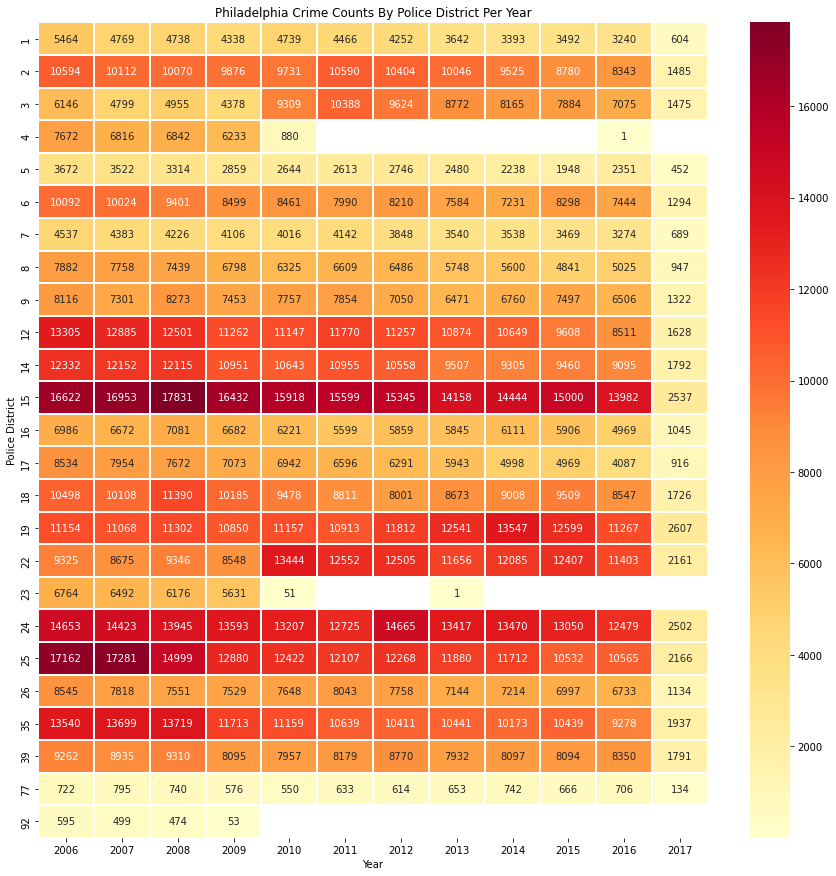

In [35]:
# Police district crime counts by year
crime_data_dist_month = crime_data.groupby(['Dc_Dist', 'Year']).size()
crime_data_dist_month = crime_data_dist_month.apply(int)
crime_data_dist_month_df = crime_data_dist_month.to_frame()
crime_data_dist_month_pt = pd.pivot_table(crime_data_dist_month_df, index=['Dc_Dist'], columns=['Year'])[0]  


# Heatmap representation
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=crime_data_dist_month_pt, annot=True, linewidths=0.1, fmt='g', cmap="YlOrRd", ax=ax)
plt.title("Philadelphia Crime Counts By Police District Per Year")
plt.xlabel("Year")
plt.ylabel("Police District")
plt.show()

We had noted earlier that the districts 15, 24, 25, 19 and 35 have the highest crime-counts. We see that to be 
the case from the above plot as well. Despite this, all the districts except - the 19th one - show decrease in 
the crime counts through the years. For the 19th district, the crime counts have increased except in the last year 2017. Since 2017 is seen to have lower counts in both the above heat-maps, it is possible we don't have full data for the year. The districts with 'hot zones' through all the years will need concerted efforts to tackle the crime-incidents. 







FINAL OBSERVATIONS: 
      As expected, we see a diurnal pattern but not a strong seasonal trend in the crime-incidents. The criminals 
      are less active in the wee hours - mostly before the sun-rise. The crime has decreased through the years --       perhaps because of better policing and educational efforts. There are many areas (such as some districts           reporting high crime-incidnets throughout the decade) which are concerning and will require more efforts           from the administration to tackle the crime incidents.